In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
import sklearn.metrics as sklm
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib.pyplot as plt

sale_2020 = pd.read_csv("../Week_3_Predit2020Data/Simu_2010_2020_dataset.csv")


# Fill Null value and filter unknown sales
sale_2020[['Pickup_InStore', 'Pickup_Curbside', 'Local_Delivery']] = sale_2020[
    ['Pickup_InStore', 'Pickup_Curbside', 'Local_Delivery']].fillna(0)

sale_2020.dropna(subset=['2020_sale'], inplace=True)
# print (sale_2017.shape)

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cols_input = [
    "Pickup_InStore",
    "Pickup_Curbside",
    "Local_Delivery",
    "POPESTIMATE2020",
    "NPOPCHG2020",
    "BIRTHS2020",
    "DEATHS2020",
    "NATURALINC2020",
    "INTERNATIONALMIG2020",
    "DOMESTICMIG2020",
    "NETMIG2020",
    "RBIRTH2020",
    "RDEATH2020",
    "RNATURALINC2020",
    "RINTERNATIONALMIG2020",
    "RDOMESTICMIG2020",
    "RNETMIG2020",
    "Total Households",
    "Hoseholds with Low Income",
    "Hoseholds with Midium Income",
    "Hoseholds with High Income",
    "Hoseholds with Supplement Security Income",
    "Hoseholds with Cash Public Assistance Income",
    "White",
    "TP_Black/African_American",
    "TP_American_Indian",
    "TP_Asian",
    "TP_Other_Pacific_Islander",
    "TP_Some_Other_Race",
    "TP_Non_Hispan/Latin",
    "TP_Hispan/Latin",
    "Total_Population",
    "POP_Teenager",
    "POP_Adult",
    "POP_Elder",
    "Teenager_Worked_In_Past_1_Year",
    "Adult_Worked_In_Past_1_Year",
    "Elder_Worked_In_Past_1_Year"
]

# print (sale_2020[cols_input].isnull().sum())


x_train, x_valid, y_train, y_valid = train_test_split(sale_2020[cols_input],
                                                    sale_2020['2020_sale'],
                                                    test_size=.5,
                                                    random_state=42)
X_train_all = sale_2020[cols_input]

In [3]:
# Scalar the dataset
scaler  = StandardScaler()
scaler.fit(X_train_all)
x_train_tf = scaler.transform(x_train)
x_valid_tf = scaler.transform(x_valid)

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def print_report(y_actual, y_pred):
    r_squared = r2_score(y_actual, y_pred)
    MAE = mean_absolute_error(y_actual, y_pred)
    MSE = mean_squared_error(y_actual, y_pred)

    print('R^2:%.3f'%r_squared)
    print('MAE:%.3f'%MAE)
    print('MSE:%.3f'%MSE)
    print(' ')
    return r_squared, MAE, MSE

## Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(x_train_tf, y_train)

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [8]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

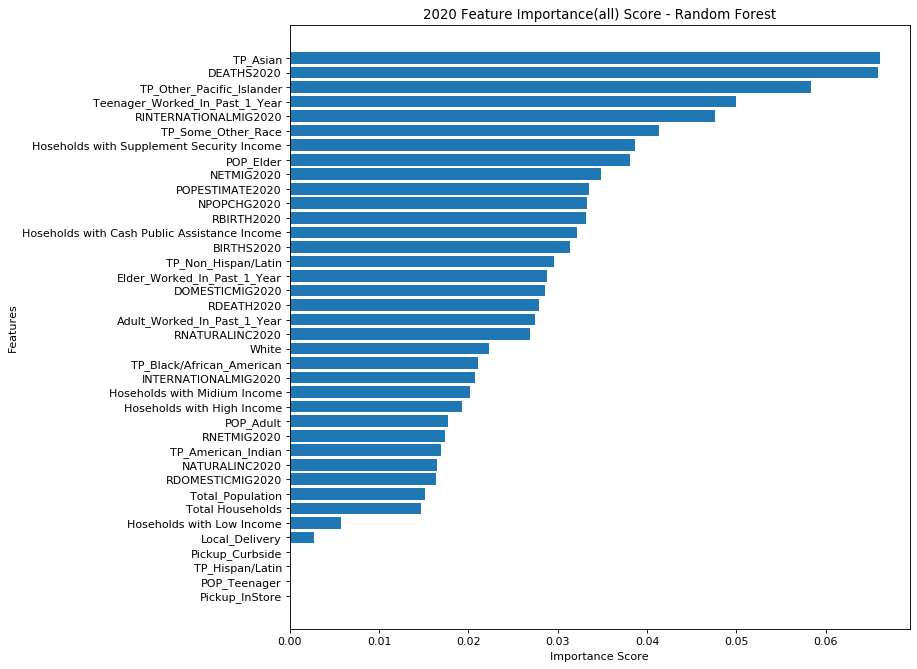

In [19]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features',)
plt.xlabel('Importance Score')
plt.title('2020 Feature Importance(all) Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

## KNN

In [5]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors = 14)
knn.fit(x_train_tf, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

In [7]:
y_train_preds = knn.predict(x_train_tf)
y_valid_preds = knn.predict(x_valid_tf)

print('KNN')
print('Training:')
knn_train_r_squared, knn_train_MAE, knn_train_MSE = print_report(y_train,y_train_preds)
print('Validation:')
knn_valid_r_squared, knn_valid_MAE, knn_valid_MSE = print_report(y_valid,y_valid_preds)

KNN
Training:
R^2:0.215
MAE:1498627.997
MSE:3657083274361.437
 
Validation:
R^2:0.150
MAE:1663254.927
MSE:4688283071709.430
 


## Gradient Boosting Regression

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
gbc =GradientBoostingRegressor(n_estimators=10, learning_rate=1,
     max_depth=3, random_state=42)
gbc.fit(x_train_tf, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
y_train_preds = gbc.predict(x_train_tf)
y_valid_preds = gbc.predict(x_valid_tf)

print('GBR')
print('Training:')
gbr_train_r_squared, gbr_train_MAE, gbr_train_MSE = print_report(y_train,y_train_preds)
print('Validation:')
gbr_valid_r_squared, gbr_valid_MAE, gbr_valid_MSE = print_report(y_valid,y_valid_preds)

GBR
Training:
R^2:0.985
MAE:141290.331
MSE:68211474402.177
 
Validation:
R^2:-0.258
MAE:2132003.291
MSE:6935380170670.818
 


## Random Forest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth = 6, random_state = 42)
rf.fit(x_train_tf, y_train)

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [11]:
y_train_preds = rf.predict(x_train_tf)
y_valid_preds = rf.predict(x_valid_tf)

print('RF')
print('Training:')
rf_train_r_squared, rf_train_MAE, rf_train_MSE = print_report(y_train,y_train_preds)
print('Validation:')
rf_valid_r_squared, rf_valid_MAE, rf_valid_MSE = print_report(y_valid,y_valid_preds)

RF
Training:
R^2:0.779
MAE:816726.177
MSE:1027198043884.654
 
Validation:
R^2:0.022
MAE:1742607.506
MSE:5392536965012.630
 


## Decision Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10, random_state = 42)
tree.fit(x_train_tf, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [13]:
y_train_preds = tree.predict(x_train_tf)
y_valid_preds = tree.predict(x_valid_tf)

print('RF')
print('Training:')
dt_train_r_squared, dt_train_MAE, dt_train_MSE = print_report(y_train,y_train_preds)
print('Validation:')
dt_valid_r_squared, dt_valid_MAE, dt_valid_MSE = print_report(y_valid,y_valid_preds)

RF
Training:
R^2:0.985
MAE:88620.204
MSE:69649431338.881
 
Validation:
R^2:-0.559
MAE:2311142.448
MSE:8598276926674.856
 


## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
y_train_preds = nb.predict(x_train_tf)
y_valid_preds = nb.predict(x_valid_tf)

print('NB')
print('Training:')
nb_train_r_squared, nb_train_MAE, nb_train_MSE = print_report(y_train,y_train_preds)
print('Validation:')
nb_valid_r_squared, nb_valid_MAE, nb_valid_MSE = print_report(y_valid,y_valid_preds)

NB
Training:
R^2:0.974
MAE:64616.500
MSE:119564304015.430
 
Validation:
R^2:-0.283
MAE:2020485.872
MSE:7075550195013.547
 


### Stochastic Gradient Descent

In [16]:
from sklearn.linear_model import SGDRegressor
sgdc=SGDRegressor(alpha = 0.1,random_state = 42)
sgdc.fit(x_train_tf, y_train)

SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [17]:
y_train_preds = sgdc.predict(x_train_tf)
y_valid_preds = sgdc.predict(x_valid_tf)

print('SGD')
print('Training:')
sgd_train_r_squared, sgd_train_MAE, sgd_train_MSE = print_report(y_train,y_train_preds)
print('Validation:')
sgd_valid_r_squared, sgd_valid_MAE, sgd_valid_MSE = print_report(y_valid,y_valid_preds)

SGD
Training:
R^2:0.374
MAE:1283528.273
MSE:2914768814675.839
 
Validation:
R^2:-0.092
MAE:1760478.781
MSE:6023908820106.840
 


In [29]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','GB','GB','RF','RF','DT','DT','NB','NB','SGD','SGD'],
                           'data_set':['train','valid']*6,
                          'R_Square':[knn_train_r_squared,
                                      0.218,
                                      gbr_train_r_squared,
                                      0.875,
                                      rf_train_r_squared,
                                      0.689,
                                      dt_train_r_squared,
                                      0.888,
                                      nb_train_r_squared,
                                      0.374,
                                      sgd_train_r_squared,
                                      0.676
                                      ],
                          'accuracy':[knn_train_MAE,
                                      knn_valid_MAE,
                                      gbr_train_MAE,
                                      gbr_valid_MAE,
                                      rf_train_MAE,
                                      rf_valid_MAE,
                                      dt_train_MAE,
                                      dt_valid_MAE,
                                      nb_train_MAE,
                                      nb_valid_MAE,
                                      sgd_train_MAE,
                                      sgd_valid_MAE]})

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

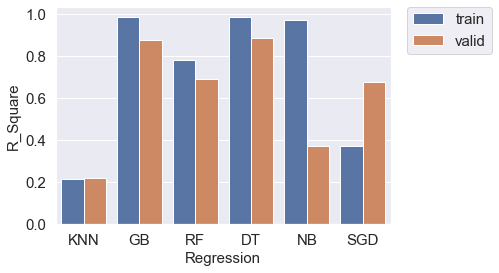

In [31]:
ax = sns.barplot(x="classifier", y="R_Square", hue="data_set", data=df_results)
ax.set_xlabel('Regression',fontsize = 15)
ax.set_ylabel('R_Square', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()